In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

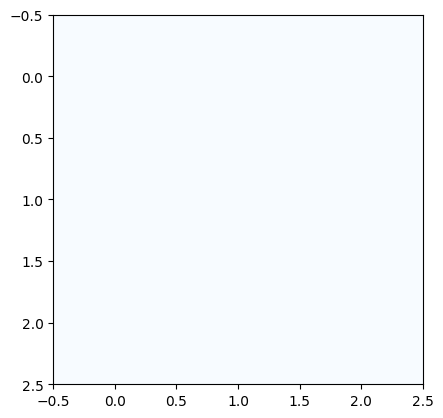

In [2]:
tablero = np.zeros((3,3))

plt.imshow(tablero, cmap='Blues')

In [103]:
class GeneticAlgorithm():
    def __init__(self, tablero, poblationSize=100, mutationRate=0.05, generations=10, elitism=True, elitePercentage=0.01, tournamentSize=5):
        self.tablero = tablero
        self.N = tablero.shape[0]*tablero.shape[1]
        self.route = list(np.arange(self.N))

        self.poblationSize = poblationSize
        self.mutationRate = mutationRate
        self.generations = generations
        self.elitism = elitism
        self.elitePercentage = elitePercentage
        self.tournamentSize = tournamentSize
        
        

        self.poblation = np.random.permutation([np.random.permutation(range(0,self.N)) for _ in range(self.poblationSize)])
        self.fitness = np.array([self.getFitness(i) for i in self.poblation])
        self.bestRoute = self.poblation[np.argmax(self.fitness)]

    def comprobarGanador(self, juego):
        '''
        Función para comprobar si hay un ganador
        '''
        juego = juego.reshape(3,3)
        # Comprobamos las filas
        if sum(juego[0,:]) == 3 or sum(juego[1,:]) == 3 or sum(juego[2,:]) == 3:
            return 1
        if sum(juego[0,:]) == -3 or sum(juego[1,:]) == -3 or sum(juego[2,:]) == -3:
            return -1
        # Comprobamos las columnas
        if sum(juego[:,0]) == 3 or sum(juego[:,1]) == 3 or sum(juego[:,2]) == 3:
            return 1
        if sum(juego[:,0]) == -3 or sum(juego[:,1]) == -3 or sum(juego[:,2]) == -3:
            return -1
        # Comprobamos las diagonales
        if sum([juego[i,i] for i in range(3)]) == 3 or sum([juego[i,i] for i in range(3)]) == -3:
            return 1
        if sum([juego[i,2-i] for i in range(3)]) == 3 or sum([juego[i,2-i] for i in range(3)]) == -3:
            return -1
        return 0


    def tournamentSelection(self):
        '''
        Función para seleccionar un individuo mediante torneo
        '''
        selection = np.random.choice(self.poblationSize, self.tournamentSize, replace=False, p=self.fitness/self.fitness.sum())
        return selection[np.argmax(self.fitness[selection])]
    
    def getFitness(self, individuo):
        '''
        Función para obtener el fitness de un individuo
        Mediante el juego de tres en raya, el individuo juega contra tournamentSize individuos aleatorios
        y se le asigna un fitness en función de las partidas ganadas
        '''
        fitness = 0
        for _ in range(self.tournamentSize):

            juego = self.tablero.copy().flatten()
            # Se elige un rival aleatorio
            rival = np.random.choice(self.poblationSize)
            rival = self.poblation[rival]
            # Se elige quien empieza, siempre empieza el individuo
            turno = 1 
            # Mientras no haya un ganador y no haya empate
            while self.comprobarGanador(juego) == 0 and 0 in juego:
                if turno == 1:
                    # El individuo juega
                    # Se elige como casilla el primer elemento de la ruta que no esté ocupada
                    for casilla in individuo:
                        if juego[casilla] == 0:
                            juego[casilla] = 1
                            break                    
                    turno = -1
                else:
                    # El rival juega
                    # Se elige como casilla el primer elemento de la ruta que no esté ocupada
                    for casilla in rival:
                        if juego[casilla] == 0:
                            juego[casilla] = -1
                            break
                    turno = 1
                    
            # Se asigna el fitness
            fitness += 1 if self.comprobarGanador(juego) == 1 else 0
        
        
        

        return fitness
    
    def mutation(self, indiviudo):
        '''
        Función para mutar un individuo
    5    '''
        new_route = indiviudo.copy()

        method = np.random.choice(['swap','inverse'])

        i,j = np.random.randint(0,self.N,2)
        while j==i:
            j = np.random.randint(0,self.N)


        if method == 'swap':
            new_route[i],new_route[j] = new_route[j],new_route[i]
        # Generamos la nueva ruta con un inverse aleatorio:
        if method == 'inverse':
            if i>j:
                i,j = j,i
            new_route[i:j+1] = new_route[i:j+1][::-1]
        
        if method == 'swap':
            if i>j:
                i,j = j,i
            new_route[i:j+1] = new_route[i:j+1][::-1]

        return new_route

    def plotRoute(self):
        '''
        Función para mostrar la ruta
        '''

        plt.figure(figsize=(10,10))
        
        
        

        
        plt.hist(self.fitness, bins=20)
        plt.title('Fitness')
        plt.show()
    def getElite(self):
        '''
        Función para obtener la elite de la población
        '''
        n = int(self.poblationSize*self.elitePercentage)
        return self.poblation[np.argsort(self.fitness)[-n:]]

    def tournamentSelection(self):
        '''
        Función para seleccionar un individuo mediante torneo
        '''
        selection = np.random.choice(self.poblationSize, self.tournamentSize, replace=True, p=self.fitness/self.fitness.sum())
        return selection[np.argmax(self.fitness[selection])]
    
    def crossover(self, parent1, parent2):
        '''
        Función para cruzar dos individuos
        '''
        child = parent1.copy()
        inx = [0,0]
        while inx[0] == inx[1]:
            inx = np.random.randint(0,self.N,2)
        inx.sort()
        i, j = inx   
        chromosomeP1 = parent1[i:j]
        
        chromosomeP2 = [i for i in parent2 if i not in chromosomeP1]
        
        child = -1*np.ones(self.N)
        child[inx[0]:inx[1]] = chromosomeP1
        # Conseguimos los índices de los -1
        inx = np.where(child==-1)[0]
        # Rellenamos los -1 con los valores de chromosomeP2
        child[inx] = chromosomeP2
        child = child.astype(int)

        return child
    
    def nextGeneration(self):
        '''
        Función para generar la siguiente generación
        '''
        newPoblation = []
        if self.elitism:
            newPoblation.extend(self.getElite())
        while len(newPoblation) < self.poblationSize:
            parent1 = self.poblation[self.tournamentSelection()]
            parent2 = self.poblation[self.tournamentSelection()]
            child = self.crossover(parent1,parent2)
            if np.random.random() < self.mutationRate:
                child = self.mutation(child)
            newPoblation.append(child)

        self.poblation = np.array(newPoblation)
        self.fitness = np.array([self.getFitness(i) for i in self.poblation])
        self.bestRoute = self.poblation[np.argmax(self.fitness)]
        # Devolvemos los índices de las ciudades de la mejor ruta
        self.route = self.bestRoute
        
        

    def run(self):
        '''
        Función para ejecutar el algoritmo genético
        '''
        
        for i in range(self.generations):
            self.nextGeneration()
            clear_output(wait=True)
            print(f'Generación {i+1}/{self.generations}')
            print(f'Best = {self.fitness.max()}')
        
        self.plotRoute()
        plt.show()

    def probar(self):
        for route in self.getElite():
            self.route = route
            self.distanciaTotal = self.totalDistance(route)
            self.plotRoute()
            plt.show()
            print(len(self.getElite()))
            clear_output(wait=True)
    
    def jugar(self, jugador1, jugador2):
        '''
        Función para jugar contra el ordenador
        '''
        juego = self.tablero.copy().flatten()
        # Se elige quien empieza, siempre empieza el individuo
        turno = 1
        # Mientras no haya un ganador y no haya empate

        while self.comprobarGanador(juego) == 0 and 0 in juego:
            if turno == 1:
                # El individuo juega
                # Se elige como casilla el primer elemento de la ruta que no esté ocupada
                for casilla in jugador1:
                    if juego[casilla] == 0:
                        juego[casilla] = 1
                        break                    
                turno = -1
            else:
                # El rival juega
                # Se elige como casilla el primer elemento de la ruta que no esté ocupada
                for casilla in jugador2:
                    if juego[casilla] == 0:
                        juego[casilla] = -1
                        break
                turno = 1
            clear_output(wait=True)
            plt.imshow(juego.reshape(3,3), cmap='Blues')
            plt.colorbar()
            plt.show()
        

Generación 30/30
Best = 90


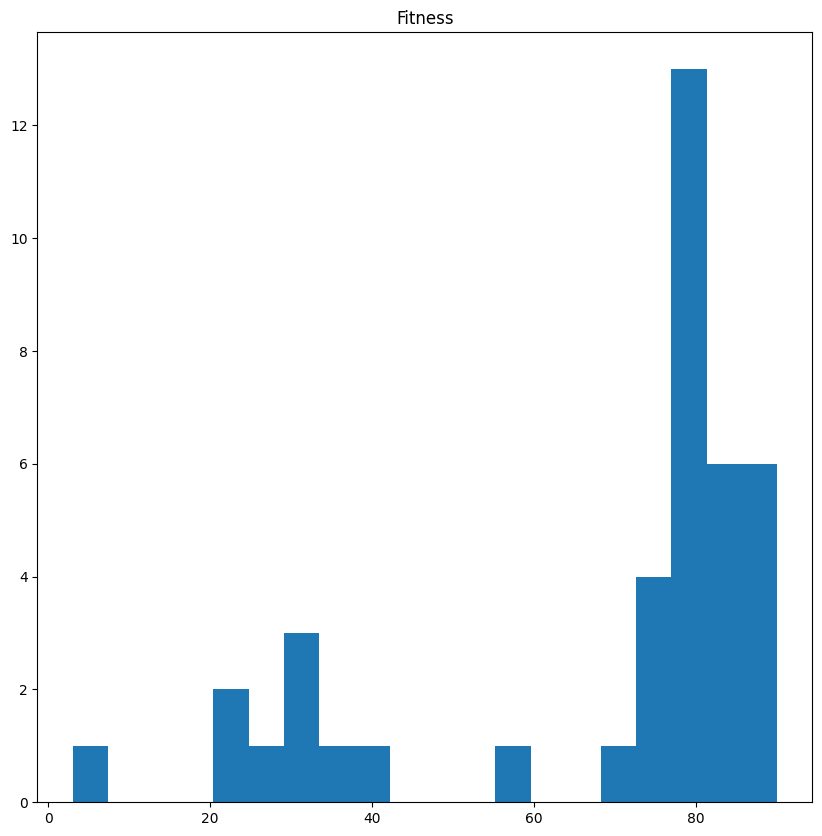

In [104]:
ga = GeneticAlgorithm(tablero, generations=30, poblationSize=40, mutationRate=0.9, elitism=False, elitePercentage=0.1, tournamentSize=100)

ga.run()

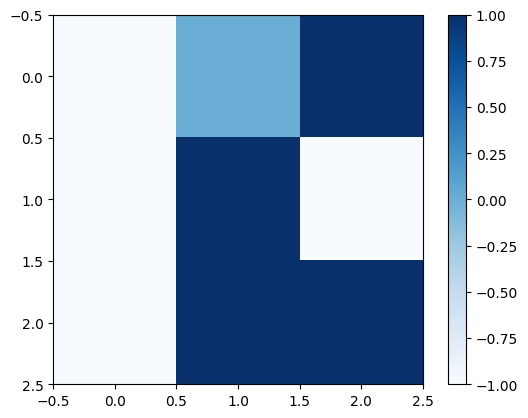

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[2 7 8 4 0 5 6 3 1]
 [3 2 7 8 4 0 5 6 1]
 [3 1 2 7 8 4 0 5 6]
 [3 6 5 0 7 8 4 2 1]
 [3 6 5 0 7 8 4 2 1]
 [3 6 5 0 8 4 7 2 1]
 [3 0 5 6 4 8 7 2 1]
 [3 6 0 5 4 8 7 2 1]
 [3 6 5 8 4 0 7 2 1]
 [5 6 3 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 2 7 8 1]
 [3 6 5 0 4 8 2 7 1]
 [3 5 6 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 2 7 8 1]
 [4 0 5 6 3 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 2 7 8 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 7 8 2 1]
 [3 6 5 0 4 8 1 2 7]
 [3 6 5 0 4 8 7 2 1]
 [3 5 6 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 2 7 8 1]
 [3 6 5 0 2 7 8 4 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 0 4 8 7 2 1]
 [3 6 5 4 0 8 7 2 1]
 [3 6 5 4 0 8 7 2 1]
 [3 6 8 4 0 5 7 2 1]
 [3 6 8 4 0 5 7 2 1]
 [8 4 0 5 6 3 7 2 1]
 [3 8 4 0 5 6 7 2 1]]


In [115]:
jugadores = ga.poblation[np.argsort(ga.fitness)]

ga.jugar(jugadores[0], jugadores[np.random.randint(1,ga.poblationSize)])

print(np.array(range(9)).reshape(3,3))
print(jugadores)